<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:

def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """     
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función
    # tiempo de muestreo    
    ts = 1/fs 
    #Genero el espacio para poder tener el espacio temporal que va de 0 a N-1
    #Flatten convierte a un array de 1 dimensión.
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    # Concatenación de matrices:
    # guardaremos las señales creadas al ir poblando la siguiente matriz vacía
    signal = np.array([], dtype=np.float).reshape(N,0)        
    #Genero la senoidal con los parametros de entrada.
    signal = a0 * np.sin(2 * np.pi * f0 * tt + p0);
    
    return tt, signal
    # fin de la función

def generador_ruido(fs,N,media = 0, varianza = 1):
    """     
    brief:  Generador de señales de ruido, con argumentos
    
    fs:       Frecuencia de muestreo de la señal [Hz]
    N:        Cantidad de muestras de la señal a generar
    media:    Media del ruido gaussiano
    varianza: Varianza del ruido gaussiano
    
    como resultado la señal devuelve:
    
    signal: señal de ruido evaluada en cada instante
    tt:     base de tiempo de la señal
    """   
    if(varianza <= 0.0 ):
        raise Exception('Varianza debe ser mayor estricto que 0. El valor fue:{}'.format(varianza))
    
    # tiempo de muestreo
    ts = 1/fs     
    #Genero el espacio para poder tener el espacio temporal que va de 0 a N-1
    #Flatten convierte a un array de 1 dimensión.
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # Concatenación de matrices:
    # guardaremos las señales creadas al ir poblando la siguiente matriz vacía
    signal = np.array([], dtype=np.float).reshape(N,0)
    #Generar señal de media X y desvio estandar sacada de numpy.
    signal = np.random.normal(media,np.sqrt(varianza),N);
        
    return tt,signal

def generador_cuadrada (fs, f0, N, a0=1, duty = 0.5):
    """     
    brief:  Generador de señal cuadrada
    
    fs:     frecuencia de muestreo de la señal [Hz]
    f0:     frecuencia de la cuadrada [Hz]
    N:      cantidad de muestras de la señal a generar
    a0:     amplitud pico de la señal [V]
    duty:   Ciclo de trabajo[%] de la señal cuadrada a generar
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """ 
    #Chequeo el duty
    if(duty > 1.0 or duty < 0.0):
        raise Exception('duty debe estar en 0.0 y 1.0. El valor de duty fue: {}'.format(duty))    
    # tiempo de muestreo 
    ts = 1/fs        
    #Flatten convierte a un array de 1 dimensión.
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # Concatenación de matrices:
    # guardaremos las señales creadas al ir poblando la siguiente matriz vacía
    yy = np.array([], dtype=np.float).reshape(N,0)
    
    #Genero la cuadrada
    yy  = a0 * signal.square(2 * np.pi * f0 * tt , duty)
   
    return tt,yy


def generador_triangular (fs, f0, N, a0=1, sym = 0.5):
    """     
    brief:  Generador de señales triangular, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    f0:     frecuencia de la triangular [Hz]
    N:      cantidad de muestras de la señal a generar
    a0:     amplitud pico de la señal [V]
    p0:     Simetria de la triangular [%]
    
    como resultado la señal devuelve:
    
    signal: señal triangular evaluada en cada instante 
    tt:     base de tiempo de la señal
    """   
    
    #Chequeo la simetria
    if(sym > 1.0 or sym < 0.0):
        raise Exception('Simetria debe estar en 0.0 y 1.0. El valor de duty fue: {}'.format(sym))    
    # tiempo de muestreo        
    ts = 1/fs 
    #Genero el espacio para poder tener el espacio temporal que va de 0 a N-1
    #Flatten convierte a un array de 1 dimensión.
    tt = np.linspace(0, (N-1)*ts, N).flatten()
    
    # guardaremos las señales creadas al ir poblando la siguiente matriz vacía
    yy = np.array([], dtype=np.float).reshape(N,0)
    # Generamos la señal de diente de sierra
    yy = signal.sawtooth(2*np.pi*f0*tt,sym)
        
    return tt,yy



a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################
#Necesario para generar señal triangular de diente de sierra y señal cuadrada con numpy
from   scipy import signal
import scipy.fftpack as sc


In [3]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


Text(0, 0.5, 'Amplitud [V]')

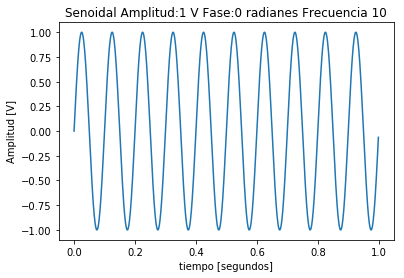

In [4]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[tt,yy] = generador_senoidal(fs,f0,N,a0,p0)

plt.plot(tt, yy)
plt.title('Senoidal Amplitud:{} V Fase:{} radianes Frecuencia {}'.format(a0,p0,f0))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')


¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se puede estimar la frecuencia de la senoidal calculando la distancia entre los maximos o los minimos, o multiplicando por 2 los cruces por cero.
</div>

Text(0, 0.5, 'Amplitud [V]')

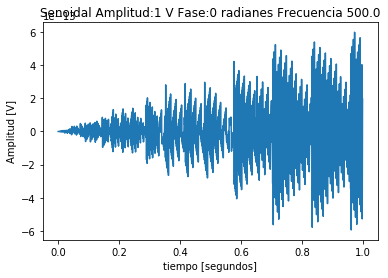

In [5]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[tt,yy] = generador_senoidal(fs,f0,N,a0,p0)

plt.plot(tt, yy)
plt.title('Senoidal Amplitud:{} V Fase:{} radianes Frecuencia {}'.format(a0,p0,f0))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')


Text(0, 0.5, 'Amplitud [V]')

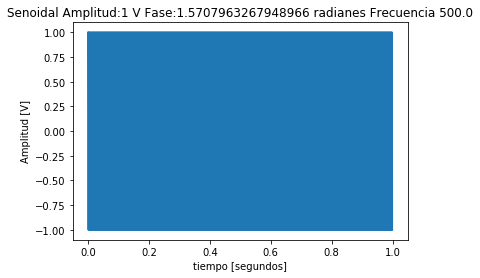

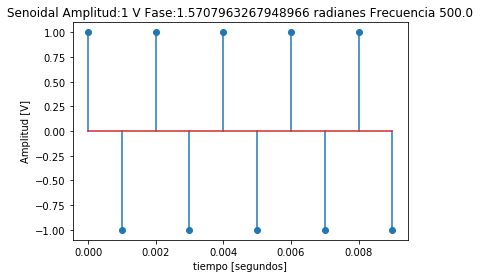

In [6]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[tt,yy] = generador_senoidal(fs,f0,N,a0,p0)

plt.figure(1)
plt.plot(tt, yy)
plt.title('Senoidal Amplitud:{} V Fase:{} radianes Frecuencia {}'.format(a0,p0,f0))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

plt.figure(2)
plt.stem(tt[:10],yy[:10])
plt.title('Senoidal Amplitud:{} V Fase:{} radianes Frecuencia {}'.format(a0,p0,f0))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En ninguno de los dos casos podria conocer los parametros de la senoidal
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso estamos sampleando una señal de > o = a FS/2 lo que va en contra del teorema de nyquist.
    Tambien tener en cuenta que en el caso a.2 estamos muestreando justo cuando la senoidal llega a cero con lo cual estamos lidiando con la presicion del python para el 0, tener en cuenta que parece creciente por el error en las cifras que se usan de PI en numpy y en el caso a.3 estamos tomando las muestras en los maximos y minimos de la senoidal. 
    En resumen nos estan faltando mas muestras por ciclo de senoidal. 
</div>

Text(0, 0.5, 'Amplitud [V]')

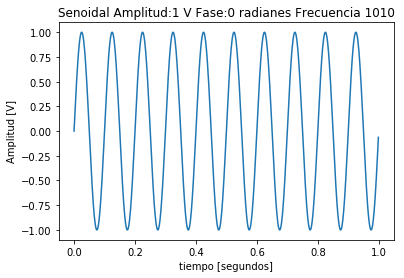

In [7]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
[tt,yy] = generador_senoidal(fs,f0,N,a0,p0)

plt.figure(1)
plt.plot(tt, yy)
plt.title('Senoidal Amplitud:{} V Fase:{} radianes Frecuencia {}'.format(a0,p0,f0))
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No pueden diferenciarse las señales de a.1 y de a.4
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Utilizando un filtro anti-aliasing o de desambiguacion, ya que estamos pasando frecuencias mas altas a frecuencias bajas y se hacen indistinguibles.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [8]:
def simple_dft(yy,fs,N):
    """
    brief:  Genera la DFT, solamente la primera mitad y en valor absoluto.
    Entradas
    yy: Señal de entrada a convertir en DFT
    ts: Tiempo de sampleo en segundos
    N:  Numero de muestras de la señal
    
    Salidas
    ff: Campo de las frecuencias para poder hacer un grafico
    XX: Espectro de la señal en valor absoluto y solo una mitad.    
    """
    #Calcula la DFT como explicada en las filminas.
    X=np.zeros((N,),dtype=np.complex128);
    for m in range(0,N):
        for n in range(0,N):
            X[m] += signal[n]*np.exp((-2j*(np.pi)*m*n)/N)
    
    ##Espectro para mostrar a la salida es solamente el valor absoluto de la mitad de las muestras.
    XX=(2/N)*np.abs(X[0:N//2])  
    ff=np.linspace(0,(fs/2),N//2)
    return ff,XX

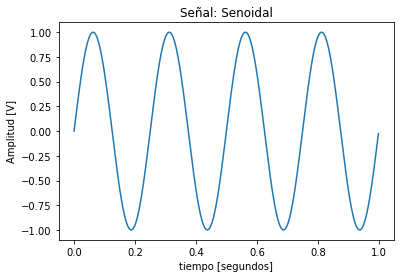

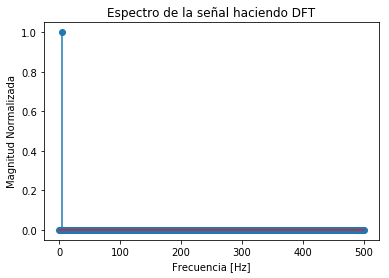

Hacemos un zoom para ver donde esta el pico de la DFT


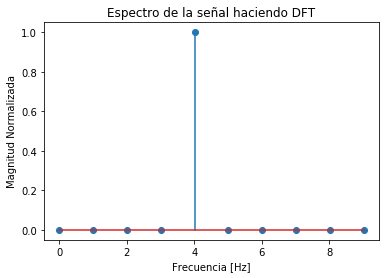

In [9]:
fs = 1000
f0 = 4
N  = 1000
a0 = 1
p0 = 2*np.pi

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

(ff,half_dft) = simple_dft(signal,fs,N)

plt.figure(2)
plt.stem(ff,half_dft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

print('Hacemos un zoom para ver donde esta el pico de la DFT')
plt.figure(3)
plt.stem(ff[:10],half_dft[:10])
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


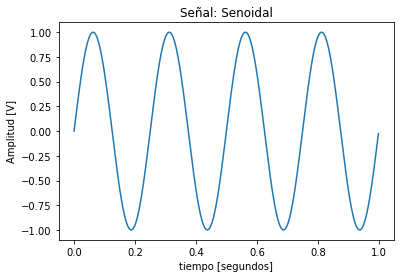

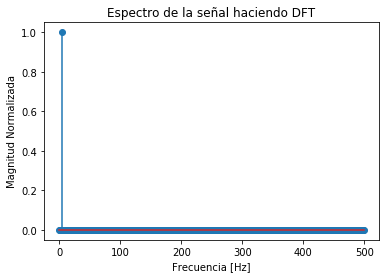

Hacemos un zoom para ver donde esta el pico de la DFT


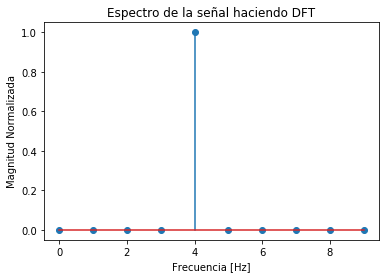

In [10]:
def simple_fft(yy,fs,N):
    """
    brief:  Genera la DFT, pero utilizando la FFT como algoritmo
    Entradas
    yy: Señal de entrada a convertir en DFT
    ts: Tiempo de sampleo en segundos
    N:  Numero de muestras de la señal
    
    Salidas
    ff: Campo de las frecuencias para poder hacer un grafico
    XX: Espectro de la señal en valor absoluto y solo una mitad.    
    """
    
    delta_f = (fs/2)/(N//2) ;
    
    XX = (2/N)*np.abs(sc.fft(yy));
    XX = XX[0:N//2];
    ff = np.linspace(0,(fs/2)-delta_f,N//2);
     
    return ff,XX

fs = 1000
f0 = 4
N  = 1000
a0 = 1
p0 = 2*np.pi

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );


plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

(ff,half_fft) = simple_fft(signal,fs,N)

plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

print('Hacemos un zoom para ver donde esta el pico de la DFT')
plt.figure(3)
plt.stem(ff[:10],half_fft[:10])
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido. Nota :Se utiliza la funcion time.process_time_ns()
</div>

In [11]:
#Se utiliza el modulo time y el metodo process_time_ns()
import time

fs = 1000
f0 = 2
N  = 2048
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))




Tiempo realizando la DFT:11.51239539[s] con N:2048
Tiempo realizando la FFT:0.000379505[s] con N:2048


In [12]:
fs = 1000
f0 = 2
N  = 1024
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:2.831170092[s] con N:1024
Tiempo realizando la FFT:0.000322209[s] con N:1024


In [13]:
fs = 1000
f0 = 2
N  = 512
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:0.717095819[s] con N:512
Tiempo realizando la FFT:0.000142915[s] con N:512


In [14]:
fs = 1000
f0 = 2
N  = 256
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:0.194121229[s] con N:256
Tiempo realizando la FFT:0.000116837[s] con N:256


In [15]:
fs = 1000
f0 = 2
N  = 128
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:0.047233425[s] con N:128
Tiempo realizando la FFT:0.000151214[s] con N:128


In [16]:
fs = 1000
f0 = 2
N  = 64
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:0.011808514[s] con N:64
Tiempo realizando la FFT:0.000144141[s] con N:64


In [17]:
fs = 1000
f0 = 2
N  = 32
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:0.002852812[s] con N:32
Tiempo realizando la FFT:0.000186596[s] con N:32


In [18]:
fs = 1000
f0 = 2
N  = 16
a0 = 1
p0 = 0

(tt,signal) = generador_senoidal(fs , f0 , N , a0 , p0 );

time_before_dft = time.process_time_ns()
(ff,half_dft) = simple_dft(signal,fs,N)
time_after_dft = time.process_time_ns()

print('Tiempo realizando la DFT:{}[s] con N:{}'.format((time_after_dft-time_before_dft)/1e9,N))

time_before_fft = time.process_time_ns()
(ff,half_fft) = simple_fft(signal,fs,N)
time_after_fft = time.process_time_ns()

print('Tiempo realizando la FFT:{}[s] con N:{}'.format((time_after_fft-time_before_fft)/1e9,N))

Tiempo realizando la DFT:0.001499428[s] con N:16
Tiempo realizando la FFT:0.000242553[s] con N:16


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [19]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   ['0.001065723'], # <-- acá debería haber numeritos :)
                   ['0.003404574'], # <-- acá debería haber numeritos :)
                   ['0.014863965'], # <-- acá debería haber numeritos :)
                   ['0.063846489'], # <-- acá debería haber numeritos :)
                   ['0.200427548'], # <-- acá debería haber numeritos :)
                   ['0.748014545'], # <-- acá debería haber numeritos :)
                   ['2.995179604'], # <-- acá debería haber numeritos :)
                   ['11.651772948']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,0.001065723
32,0.003404574
64,0.014863965
128,0.063846489
256,0.200427548
512,0.748014545
1024,2.995179604
2048,11.651772948


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

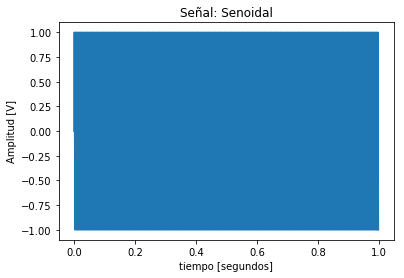

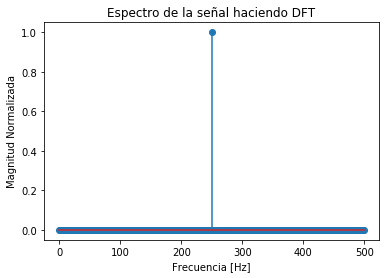

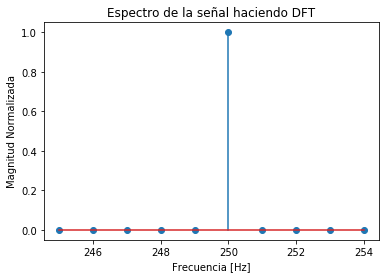

Magnitud Frecuencia Central:1.0 para fs/4 + 0
Magnitud Frecuencia Adyacente:2.0232342018925938e-14 para fs/4 + 0
Magnitud Resto de las frecuencias:1.0169755128453705e-12 para fs/4 + 0


In [20]:
fs = 1000
f0 = fs/4
delta = 0
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );


plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()


(ff,half_fft) = simple_fft(signal,fs,N)

plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

#Hacemos un sum en la frecuencia de interes
plt.figure(3)
plt.stem(ff[int(f0-5):int(f0+5)],half_fft[int(f0-5):int(f0+5)])
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


print('Magnitud Frecuencia Central:{} para fs/4 + {}'.format(half_fft[int(f0)],delta))
print('Magnitud Frecuencia Adyacente:{} para fs/4 + {}'.format(half_fft[int(f0+1)],delta))

spread = np.sum(np.concatenate((half_fft[:int(f0)],half_fft[int(f0)+1:]),axis=0))
print('Magnitud Resto de las frecuencias:{} para fs/4 + {}'.format(spread,delta))

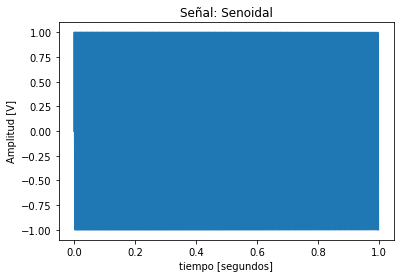

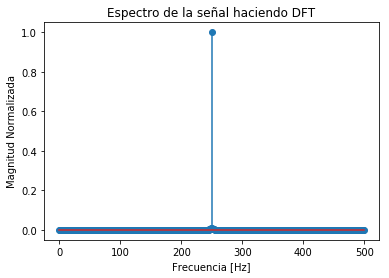

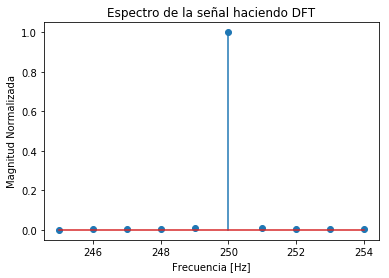

Magnitud Frecuencia Central:0.9998335450382972 para fs/4 + 0.01
Magnitud Frecuencia Adyacente:0.010101383898823976 para fs/4 + 0.01
Magnitud Resto de las frecuencias:0.12677455963157808 para fs/4 + 0.01


In [21]:
fs = 1000
f0 = fs/4
delta = 0.01
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );


plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()


(ff,half_fft) = simple_fft(signal,fs,N)

plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

#Hacemos un sum en la frecuencia de interes
plt.figure(3)
plt.stem(ff[int(f0-5):int(f0+5)],half_fft[int(f0-5):int(f0+5)])
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


print('Magnitud Frecuencia Central:{} para fs/4 + {}'.format(half_fft[int(f0)],delta))
print('Magnitud Frecuencia Adyacente:{} para fs/4 + {}'.format(half_fft[int(f0+1)],delta))

spread = np.sum(np.concatenate((half_fft[:int(f0)],half_fft[int(f0)+1:]),axis=0))
print('Magnitud Resto de las frecuencias:{} para fs/4 + {}'.format(spread,delta))

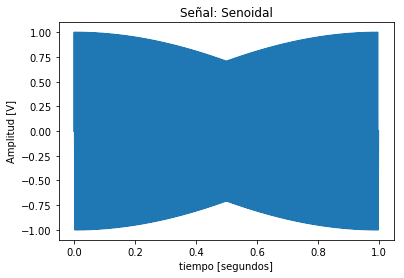

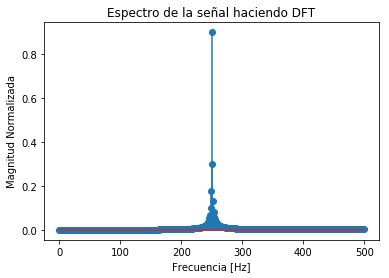

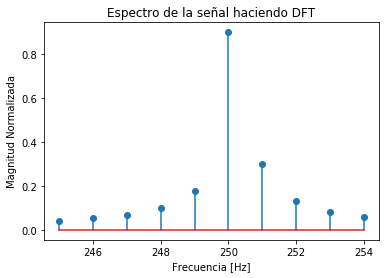

Magnitud Frecuencia Central:0.899609302590939 para fs/4 + 0.25
Magnitud Frecuencia Adyacente:0.3008128277625503 para fs/4 + 0.25
Magnitud Resto de las frecuencias:2.804288300620473 para fs/4 + 0.25


In [22]:
fs = 1000
f0 = fs/4
delta = 0.25
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );


plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()


(ff,half_fft) = simple_fft(signal,fs,N)

plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

#Hacemos un sum en la frecuencia de interes
plt.figure(3)
plt.stem(ff[int(f0-5):int(f0+5)],half_fft[int(f0-5):int(f0+5)])
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


print('Magnitud Frecuencia Central:{} para fs/4 + {}'.format(half_fft[int(f0)],delta))
print('Magnitud Frecuencia Adyacente:{} para fs/4 + {}'.format(half_fft[int(f0+1)],delta))

spread = np.sum(np.concatenate((half_fft[:int(f0)],half_fft[int(f0)+1:]),axis=0))
print('Magnitud Resto de las frecuencias:{} para fs/4 + {}'.format(spread,delta))

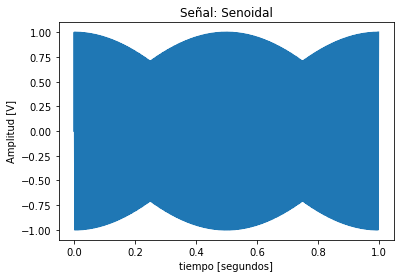

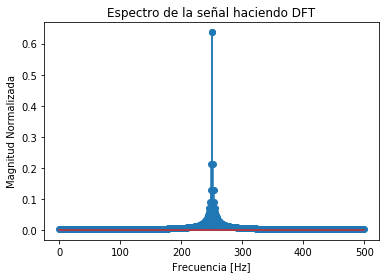

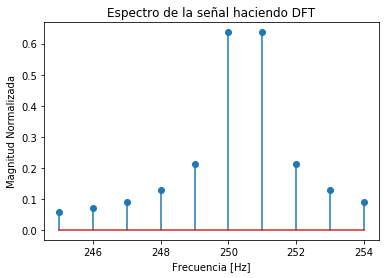

Magnitud Frecuencia Central:0.6366176779711065 para fs/4 + 0.5
Magnitud Frecuencia Adyacente:0.6366239611925769 para fs/4 + 0.5
Magnitud Resto de las frecuencias:4.282238291492439 para fs/4 + 0.5


In [23]:
fs = 1000
f0 = fs/4
delta = 0.50
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );


plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()


(ff,half_fft) = simple_fft(signal,fs,N)

plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

#Hacemos un zoom en la frecuencia de interes
plt.figure(3)
plt.stem(ff[int(f0-5):int(f0+5)],half_fft[int(f0-5):int(f0+5)])
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


print('Magnitud Frecuencia Central:{} para fs/4 + {}'.format(half_fft[int(f0)],delta))
print('Magnitud Frecuencia Adyacente:{} para fs/4 + {}'.format(half_fft[int(f0+1)],delta))

spread = np.sum(np.concatenate((half_fft[:int(f0)],half_fft[int(f0)+1:]),axis=0))
print('Magnitud Resto de las frecuencias:{} para fs/4 + {}'.format(spread,delta))

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [24]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  ['1.0', '2.023e-14', '1.016e-12'], # <-- acá debería haber numeritos :)
                  ['0.999', '0.010', '0.126'], # <-- acá debería haber numeritos :)
                  ['0.899', '0.300', '2.804'], # <-- acá debería haber numeritos :)
                  ['0.636', '0.636', '4.282']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1.0,2.023e-14,1.016e-12
$f_S/4+0.01$,0.999,0.010,0.126
$f_S/4+0.25$,0.899,0.300,2.804
$f_S/4+0.5$,0.636,0.636,4.282


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

In [25]:
def center_of_mass_fft(ff,half_fft):
    return ((np.sum(np.multiply(ff,half_fft)))/np.sum(half_fft))

In [26]:
error_vector = np.zeros(5)

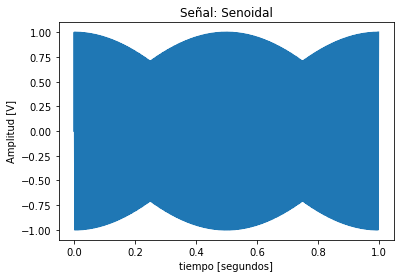

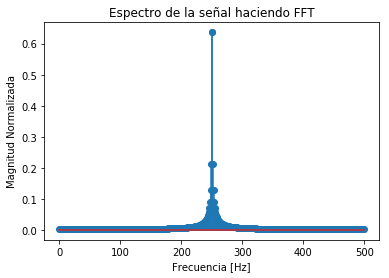

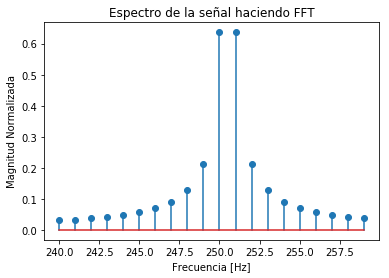

Zero Padding de 0
Frecuencia Target es: 250.5 Hz
Frecuencia donde se encuentra el maximo: 251.0 Hz
Centro de masa de la frecuencia 250.35
Paso de frecuencia:1.0 Hz
Error Metodo Frecuencia Maxima:0.19960079840319359 [%]


In [27]:
# Inserte aquí su código

fs = 1000
ts = 1/fs
f0 = fs/4
delta = 0.5
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );

#Realizo el zero padding
signal = np.pad(signal,(0,0),'constant')
tt = np.linspace(0,(len(signal)-1)*ts, len(signal)).flatten()

#Hago un plot de la señal senoidal
plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

(ff,half_fft) = simple_fft(signal,fs,len(signal))

#Hago el ploteo de la FFT
plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

#Hacemos un zoom de la FFT
plt.figure(3)
plt.stem(ff[240:260],half_fft[240:260])
plt.title('Espectro de la señal haciendo FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


max_mag_value = np.amax(half_fft);
max_freq_value = np.where(half_fft == max_mag_value)

print('Zero Padding de 0')
print('Frecuencia Target es: {} Hz'.format(f0 + delta))
print('Frecuencia donde se encuentra el maximo: {} Hz'.format(round(ff[max_freq_value[0][0]],2)))
print('Centro de masa de la frecuencia {}'.format(round(center_of_mass_fft(ff,half_fft),2)))
print('Paso de frecuencia:{} Hz'.format((ff[1]-ff[0])))

error_vector[0] = (np.abs((f0 + delta) - ff[max_freq_value[0][0]])/(f0 + delta))*100
print('Error Metodo Frecuencia Maxima:{} [%]'.format(error_vector[0]))
                                    



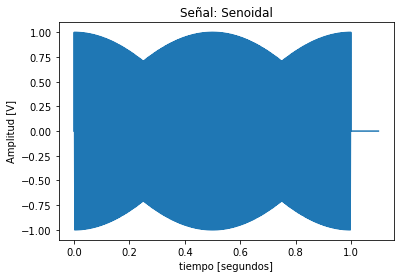

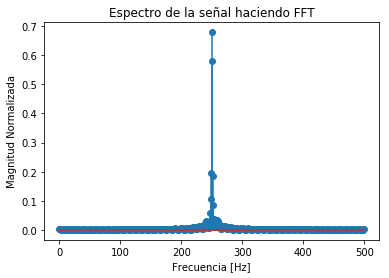

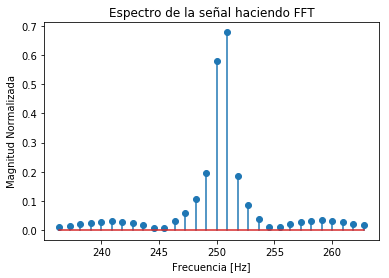

Zero Padding de N//10
Frecuencia Target es: 250.5 Hz
Frecuencia donde se encuentra el maximo: 250.91 Hz
Centro de masa de la frecuencia 250.31
Paso de frecuencia:0.9090909090909091 Hz
Error Metodo Frecuencia Maxima:0.16330974414806648 [%]


In [28]:
# Inserte aquí su código

fs = 1000
ts = 1/fs
f0 = fs/4
delta = 0.5
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );

#Realizo el zero padding
signal = np.pad(signal,(0,N//10),'constant')
tt = np.linspace(0,(len(signal)-1)*ts, len(signal)).flatten()

#Hago un plot de la señal senoidal
plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

(ff,half_fft) = simple_fft(signal,fs,len(signal))

#Hago el ploteo de la FFT
plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

#Hacemos un zoom de la FFT
plt.figure(3)
plt.stem(ff[260:290],half_fft[260:290])
plt.title('Espectro de la señal haciendo FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


max_mag_value = np.amax(half_fft);
max_freq_value = np.where(half_fft == max_mag_value)

print('Zero Padding de N//10')
print('Frecuencia Target es: {} Hz'.format(f0 + delta))
print('Frecuencia donde se encuentra el maximo: {} Hz'.format(round(ff[max_freq_value[0][0]],2)))
print('Centro de masa de la frecuencia {}'.format(round(center_of_mass_fft(ff,half_fft),2)))
print('Paso de frecuencia:{} Hz'.format((ff[1]-ff[0])))

error_vector[2] = (np.abs((f0 + delta) - ff[max_freq_value[0][0]])/(f0 + delta))*100
print('Error Metodo Frecuencia Maxima:{} [%]'.format(error_vector[2]))



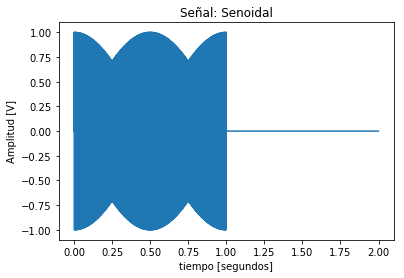

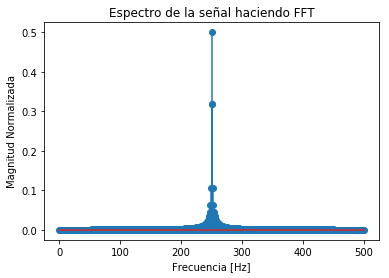

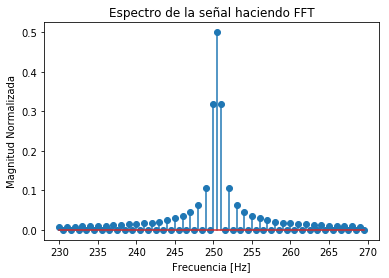

Zero Padding de N//10
Frecuencia Target es: 250.5 Hz
Frecuencia donde se encuentra el maximo: 250.5 Hz
Centro de masa de la frecuencia 250.38
Paso de frecuencia:0.5 Hz
Error Metodo Frecuencia Maxima:0.0 [%]


In [29]:
# Inserte aquí su código

fs = 1000
ts = 1/fs
f0 = fs/4
delta = 0.5
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );

#Realizo el zero padding
signal = np.pad(signal,(0,N),'constant')
tt = np.linspace(0,(len(signal)-1)*ts, len(signal)).flatten()

#Hago un plot de la señal senoidal
plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

(ff,half_fft) = simple_fft(signal,fs,len(signal))

#Hago el ploteo de la FFT
plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()


#Hago un zoom
plt.figure(3)
plt.stem(ff[460:540],half_fft[460:540])
plt.title('Espectro de la señal haciendo FFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

max_mag_value = np.amax(half_fft);
max_freq_value = np.where(half_fft == max_mag_value)

print('Zero Padding de N//10')
print('Frecuencia Target es: {} Hz'.format(f0 + delta))
print('Frecuencia donde se encuentra el maximo: {} Hz'.format(round(ff[max_freq_value[0][0]],2)))
print('Centro de masa de la frecuencia {}'.format(round(center_of_mass_fft(ff,half_fft),2)))
print('Paso de frecuencia:{} Hz'.format((ff[1]-ff[0])))

error_vector[2] = (np.abs((f0 + delta) - ff[max_freq_value[0][0]])/(f0 + delta))*100
print('Error Metodo Frecuencia Maxima:{} [%]'.format(error_vector[2]))



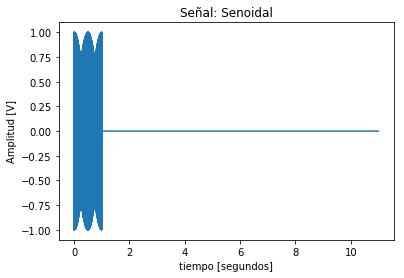

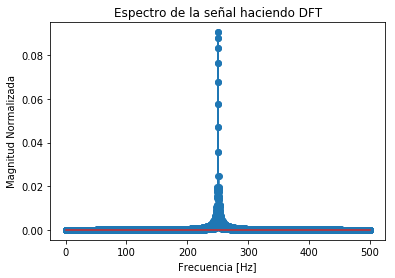

Zero Padding de N//10
Frecuencia Target es: 250.5 Hz
Frecuencia donde se encuentra el maximo: 250.5455 Hz
Centro de masa de la frecuencia 250.447
Paso de frecuencia:0.09090909090909091 Hz
Error Metodo Frecuencia Maxima:0.018145527127569245 [%]


In [30]:
# Inserte aquí su código

fs = 1000
ts = 1/fs
f0 = fs/4
delta = 0.5
N  = 1000
a0 = 1
p0 = 0

#Generar la senoidal
(tt,signal) = generador_senoidal(fs , f0 + delta , N , a0 , p0 );

#Realizo el zero padding
signal = np.pad(signal,(0,N*10),'constant')
tt = np.linspace(0,(len(signal)-1)*ts, len(signal)).flatten()

#Hago un plot de la señal senoidal
plt.figure(1)
line_hdls = plt.plot(tt,signal)
plt.title('Señal: ' + 'Senoidal')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.show()

(ff,half_fft) = simple_fft(signal,fs,len(signal))

#Hago el ploteo de la FFT
plt.figure(2)
plt.stem(ff,half_fft)
plt.title('Espectro de la señal haciendo DFT')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud Normalizada')
plt.show()

max_mag_value = np.amax(half_fft);
max_freq_value = np.where(half_fft == max_mag_value)

print('Zero Padding de N//10')
print('Frecuencia Target es: {} Hz'.format(f0 + delta))
print('Frecuencia donde se encuentra el maximo: {} Hz'.format(round(ff[max_freq_value[0][0]],4)))
print('Centro de masa de la frecuencia {}'.format(round(center_of_mass_fft(ff,half_fft),4)))
print('Paso de frecuencia:{} Hz'.format((ff[1]-ff[0])))

error_vector[3] = (np.abs((f0 + delta) - ff[max_freq_value[0][0]])/(f0 + delta))*100
print('Error Metodo Frecuencia Maxima:{} [%]'.format(error_vector[3]))



**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La resolucion espectro aumenta dependiendo de cuantos ceros se agreguen, no quiere decir que se agregue informacion, el espectro en si se ve distorsionado como desplazado en el tiempo por un sinc.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En el caso N/10 la resolucion espectral baja a 0.91 con lo cual el valor 250.5Hz queda mas cerca de 250.91. Con N la resolucion espectral baja a 0.5 con lo cual la frecuencia de 250.5Hz cae justo donde tiene que caer. Con lo cual el maximo da en dicho lugar. Con N*10 tenemos un error mas alto ya que un bin no cae en la frecuencia target. Pero seguimos estando cerca.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [31]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = ['{}'.format(round(error_vector[0],4)), # <-- acá debería haber numeritos :)
                  '{}'.format(round(error_vector[1],4)), # <-- acá debería haber numeritos :)
                  '{}'.format(round(error_vector[2],4)), # <-- acá debería haber numeritos :)
                  '{}'.format(round(error_vector[3],4)) # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.1996
$N/10$,0.0
$N$,0.0
$10N$,0.0181


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [32]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [33]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [34]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [35]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [36]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [37]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [38]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [39]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [40]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [41]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [42]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [43]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [44]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>